<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/Comparison/Filters/test%204%20filters_8%20shift_109s_Orth%203Ch%20best(Oz%2CT7%2CCz)_35_Epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
>> test 4 filters

>> Orthogonal best channel

109 subject
3 channel: [61,40,10] (Oz,T7,Cz)
task: REO 
epoch: 35
seed = 14

*outer_sample_shift = 8  # outer step len


'''


'\nbest channel (Oz)\nepoch: 120\n\nTrainResult ([loss , acc])= [0.018957456561174885, 0.9955648194583752]\nValidationResult ([loss , acc])= [0.0443783304768607, 0.9868850401606426]\nTestResult ([loss , acc])= [0.04897509974022275, 0.984312624750499]\n\n'

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
!pip install mne

In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=50
subject_number=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[61,40,10]  #Oz
ch_number=len(list_channel)
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =8  # outer step len
window_len= 20
batch_size=64


In [60]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model
from keras import backend as KerasBackend
from keras.callbacks import EarlyStopping



# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Automatically created module for IPython interactive environment


In [61]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_number
for x in range(subject_number):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')
'''
list_rawdata1 = np.zeros((subject_number,task_number), dtype='object')
list_rawdata = np.zeros((subject_number,task_number), dtype='object')

for i in range(subject_number):
  for j in range(task_number):
    list_rawdata1[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)
    list_rawdata[i][j]= list_rawdata1[i][j].copy().filter(4,8, fir_design ='firwin')

'''

"\nlist_rawdata1 = np.zeros((subject_number,task_number), dtype='object')\nlist_rawdata = np.zeros((subject_number,task_number), dtype='object')\n\nfor i in range(subject_number):\n  for j in range(task_number):\n    list_rawdata1[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)\n    list_rawdata[i][j]= list_rawdata1[i][j].copy().filter(4,8, fir_design ='firwin')\n\n"

In [35]:
list_rawdata1 = np.zeros((subject_number,task_number), dtype='object')
list_rawdata = np.zeros((subject_number,task_number), dtype='object')

for i in range(subject_number):
  for j in range(task_number):
    list_rawdata1[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)
    list_rawdata[i][j]= list_rawdata1[i][j].copy().filter(8,15, fir_design ='firwin')

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 265 samples (1.656 sec)

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detecte

In [41]:
list_rawdata1 = np.zeros((subject_number,task_number), dtype='object')
list_rawdata = np.zeros((subject_number,task_number), dtype='object')

for i in range(subject_number):
  for j in range(task_number):
    list_rawdata1[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)
    list_rawdata[i][j]= list_rawdata1[i][j].copy().filter(15,32, fir_design ='firwin')

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 15 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 141 samples (0.881 sec)

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file dete

In [62]:
list_rawdata1 = np.zeros((subject_number,task_number), dtype='object')
list_rawdata = np.zeros((subject_number,task_number), dtype='object')

for i in range(subject_number):
  for j in range(task_number):
    list_rawdata1[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)
    list_rawdata[i][j]= list_rawdata1[i][j].copy().filter(32,40, fir_design ='firwin')

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 32 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 32.00
- Lower transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 28.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 67 samples (0.419 sec)

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file dete

In [67]:
list_rawdata1 = np.zeros((subject_number,task_number), dtype='object')
list_rawdata = np.zeros((subject_number,task_number), dtype='object')

for i in range(subject_number):
  for j in range(task_number):
    list_rawdata1[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)
    list_rawdata[i][j]= list_rawdata1[i][j].copy().filter(0,40, fir_design ='firwin')

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 53 samples (0.331 sec)

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    6

In [68]:
# img for each subject
subject_img_number = math.floor((total_sampel_number - sampel_number_per_sec - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
print(train_number , val_number , test_number)
subject_img_number

878 175 118


1171

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
        
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        for i in range(len(ListChannel)):
            DataChannelsRaw[s][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[s][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[s][i])) # min for each cannel

            DataChannelsNormal[s][i]=normalize_channel_data(DataChannelsRaw[s][i].copy(), i, ch_min, ch_max)


        # make Channels Orthogonal
        DataChannelsOrt[s][0]=DataChannelsNormal[s][0]
        DataChannelsOrt[s][1]=DataChannelsNormal[s][1]-ProjectionVector(DataChannelsOrt[s][0].copy(),DataChannelsNormal[s][1].copy())*OrthogonalFlag
        DataChannelsOrt[s][2]=DataChannelsNormal[s][2]-ProjectionVector(DataChannelsOrt[s][0].copy(),DataChannelsNormal[s][2].copy())*OrthogonalFlag\
                                                      -ProjectionVector(DataChannelsOrt[s][1].copy(),DataChannelsNormal[s][2].copy())*OrthogonalFlag

        
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, SampelNumberPerSec), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsOrt[s][i][0+j*OuterSampleShift + z*InnerSampleShift:SampelNumberPerSec+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,len(SubjectArrayShuffled))
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
#####################################################################################################

# Reset Model and Data Arrays

list_rawdataTemp=list_rawdata.copy()

    
#################################################################################################
# Construct Data Generator

GenTrainData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled=subject_number_array_shuffled,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled=train_shuff)

GenValidationData =GenerateGeneralData(BatchSize=batch_size,
                                        ListRawDataMain=list_rawdataTemp.copy(),
                                        SubjectArrayShuffled=subject_number_array_shuffled,
                                        ListChannel=list_channel,
                                        RemoveBaseLineFlag=RemoveBaseLine,
                                        OrthogonalFlag=Orthogonal,
                                        WindowLen=window_len,
                                        OuterSampleShift=outer_sample_shift,
                                        InnerSampleShift=inner_sample_shift,
                                        SampelNumberPerSec=sampel_number_per_sec,
                                        ImageArrayShuffled=val_shuff)

GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                ListRawDataMain=list_rawdataTemp.copy(),
                                SubjectArrayShuffled=subject_number_array_shuffled,
                                ListChannel=list_channel,
                                RemoveBaseLineFlag=RemoveBaseLine,
                                OrthogonalFlag=Orthogonal,
                                WindowLen=window_len,
                                OuterSampleShift=outer_sample_shift,
                                InnerSampleShift=inner_sample_shift,
                                SampelNumberPerSec=sampel_number_per_sec,
                                ImageArrayShuffled=test_shuff)

#################################################################################################
# Create Model
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same', input_shape = (window_len,160,ch_number) ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(subject_number, activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])


In [0]:
model.summary()

Epoch 1/35
1496/1496 [==============================] - 49s 33ms/step - loss: 3.6800 - acc: 0.0795 - val_loss: 2.7025 - val_acc: 0.2488
Epoch 2/35
1496/1496 [==============================] - 43s 29ms/step - loss: 2.4100 - acc: 0.2746 - val_loss: 2.2214 - val_acc: 0.2744
Epoch 3/35
1496/1496 [==============================] - 43s 29ms/step - loss: 1.6081 - acc: 0.4832 - val_loss: 0.8589 - val_acc: 0.7377
Epoch 4/35
1496/1496 [==============================] - 42s 28ms/step - loss: 1.0796 - acc: 0.6493 - val_loss: 0.4382 - val_acc: 0.8834
Epoch 5/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.8274 - acc: 0.7413 - val_loss: 0.2596 - val_acc: 0.9339
Epoch 6/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.6887 - acc: 0.7974 - val_loss: 0.1912 - val_acc: 0.9504
Epoch 7/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.5907 - acc: 0.8339 - val_loss: 0.2522 - val_acc: 0.9173
Epoch 8/35
1496/1496 [==========================

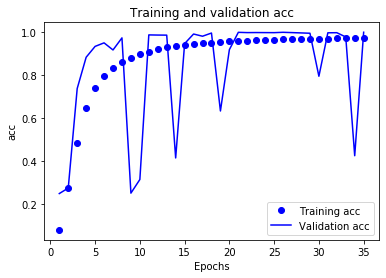

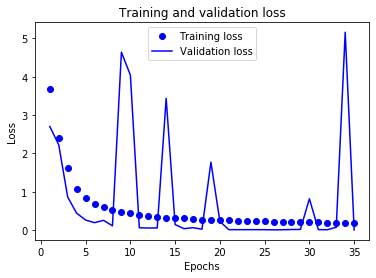

In [21]:

#################################################################################################
earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)

# Train the Model
history = model.fit_generator(epochs =35,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              #callbacks=[earlystopping_callback],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
model.save('/content/drive/My Drive/mymodels/filter4-8_1 .h5')

Automatically created module for IPython interactive environment


Epoch 1/35
1496/1496 [==============================] - 46s 31ms/step - loss: 3.7734 - acc: 0.0805 - val_loss: 2.8215 - val_acc: 0.1983
Epoch 2/35
1496/1496 [==============================] - 43s 29ms/step - loss: 2.4632 - acc: 0.2794 - val_loss: 2.3210 - val_acc: 0.2613
Epoch 3/35
1496/1496 [==============================] - 43s 29ms/step - loss: 1.6659 - acc: 0.4729 - val_loss: 1.8864 - val_acc: 0.3823
Epoch 4/35
1496/1496 [==============================] - 43s 29ms/step - loss: 1.1489 - acc: 0.6288 - val_loss: 1.5388 - val_acc: 0.4580
Epoch 5/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.7784 - acc: 0.7517 - val_loss: 0.2727 - val_acc: 0.9227
Epoch 6/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.5834 - acc: 0.8228 - val_loss: 0.1857 - val_acc: 0.9468
Epoch 7/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.4740 - acc: 0.8634 - val_loss: 0.1709 - val_acc: 0.9452
Epoch 8/35
1496/1496 [==========================

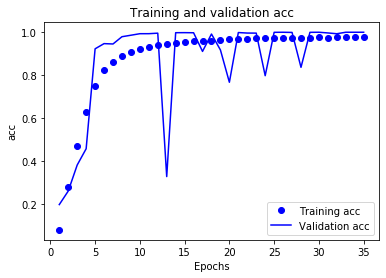

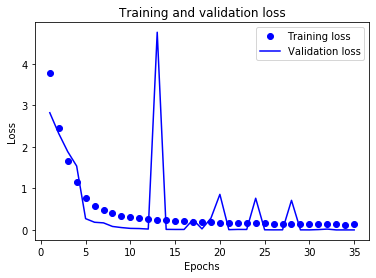

In [40]:

#################################################################################################
earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)

# Train the Model
history = model.fit_generator(epochs =35,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              #callbacks=[earlystopping_callback],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

Epoch 1/35
1496/1496 [==============================] - 45s 30ms/step - loss: 3.5856 - acc: 0.1042 - val_loss: 2.3446 - val_acc: 0.3283
Epoch 2/35
1496/1496 [==============================] - 43s 29ms/step - loss: 1.8845 - acc: 0.4158 - val_loss: 0.9205 - val_acc: 0.7452
Epoch 3/35
1496/1496 [==============================] - 44s 29ms/step - loss: 1.0439 - acc: 0.6500 - val_loss: 1.7253 - val_acc: 0.4621
Epoch 4/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.6211 - acc: 0.7925 - val_loss: 0.5954 - val_acc: 0.7866
Epoch 5/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.4007 - acc: 0.8682 - val_loss: 0.2146 - val_acc: 0.9273
Epoch 6/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.2882 - acc: 0.9104 - val_loss: 0.6000 - val_acc: 0.7869
Epoch 7/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.2232 - acc: 0.9324 - val_loss: 0.3390 - val_acc: 0.8756
Epoch 8/35
1496/1496 [==========================

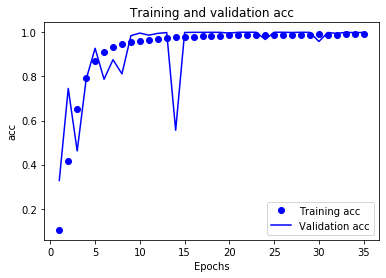

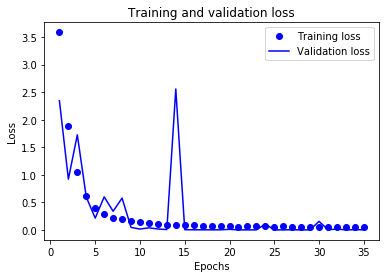

In [47]:

#################################################################################################
earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)

# Train the Model
history = model.fit_generator(epochs =35,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              #callbacks=[earlystopping_callback],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

Epoch 1/35
1496/1496 [==============================] - 45s 30ms/step - loss: 3.3712 - acc: 0.1244 - val_loss: 2.1287 - val_acc: 0.3888
Epoch 2/35
1496/1496 [==============================] - 43s 29ms/step - loss: 1.9595 - acc: 0.3772 - val_loss: 1.2004 - val_acc: 0.6376
Epoch 3/35
1496/1496 [==============================] - 43s 29ms/step - loss: 1.2847 - acc: 0.5724 - val_loss: 1.0569 - val_acc: 0.6448
Epoch 4/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.9099 - acc: 0.6885 - val_loss: 0.5604 - val_acc: 0.8065
Epoch 5/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.6942 - acc: 0.7641 - val_loss: 0.3181 - val_acc: 0.8999
Epoch 6/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.5370 - acc: 0.8219 - val_loss: 1.4278 - val_acc: 0.5563
Epoch 7/35
1496/1496 [==============================] - 42s 28ms/step - loss: 0.4215 - acc: 0.8631 - val_loss: 0.1651 - val_acc: 0.9478
Epoch 8/35
1496/1496 [==========================

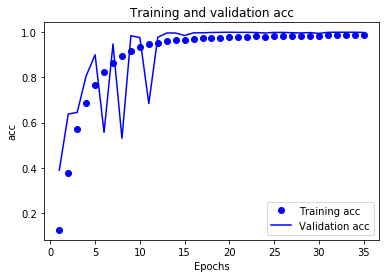

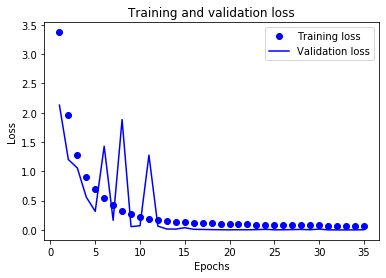

In [56]:

#################################################################################################
earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)

# Train the Model
history = model.fit_generator(epochs =35,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              #callbacks=[earlystopping_callback],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

Epoch 1/35
1496/1496 [==============================] - 46s 31ms/step - loss: 3.5000 - acc: 0.1209 - val_loss: 2.4424 - val_acc: 0.3443
Epoch 2/35
1496/1496 [==============================] - 43s 29ms/step - loss: 2.0348 - acc: 0.4187 - val_loss: 1.5128 - val_acc: 0.5581
Epoch 3/35
1496/1496 [==============================] - 43s 29ms/step - loss: 1.2376 - acc: 0.6247 - val_loss: 0.9567 - val_acc: 0.7134
Epoch 4/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.8263 - acc: 0.7402 - val_loss: 0.4931 - val_acc: 0.8545
Epoch 5/35
1496/1496 [==============================] - 43s 28ms/step - loss: 0.5668 - acc: 0.8181 - val_loss: 0.3526 - val_acc: 0.8915
Epoch 6/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.3957 - acc: 0.8709 - val_loss: 0.2713 - val_acc: 0.9161
Epoch 7/35
1496/1496 [==============================] - 43s 29ms/step - loss: 0.2831 - acc: 0.9070 - val_loss: 0.1776 - val_acc: 0.9461
Epoch 8/35
1496/1496 [==========================

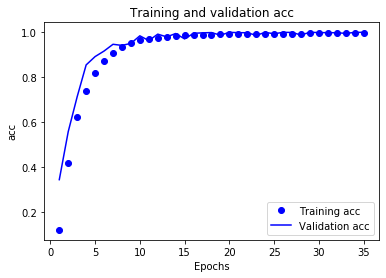

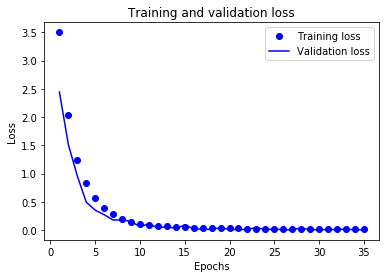

In [72]:

#################################################################################################
earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)

# Train the Model
history = model.fit_generator(epochs =35,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              #callbacks=[earlystopping_callback],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()